Projekt zaliczeniowy na przedmiot Eksploracja Danych

Analiza skupień państw i narodów w kontekście gospodarczo-politycznym

## 1. Importowanie bibliotek

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## 2. Wczytywanie danych (tu wstawisz swoje dane)

In [88]:
df_wb = pd.read_csv("worldbank.csv")
df_wb.head()

,location_key,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,...,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,VC.BTL.DETH,VC.IDP.NWCV,VC.IDP.NWDS,VC.IDP.TOCV,VC.IHR.PSRC.FE.P5,VC.IHR.PSRC.MA.P5,VC.IHR.PSRC.P5,VC.PKP.TOTL.UN
0,AD,NaN,NaN,NaN,187.800007,39.957448,7.800000e+02,0.010091,1.659574,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,AE,NaN,3.378659,714.927237,3887.999878,5.474514,4.450000e+04,0.004754,0.626584,282.0,...,NaN,NaN,NaN,NaN,220.0,NaN,0.4,0.7,0.5,NaN
2,AF,NaN,590.067055,12.182300,379100.000000,58.067580,7.729000e+06,0.218437,11.838679,2418725.0,...,20.089394,14.556820,25682.0,461000.0,117000.0,2993000.0,NaN,NaN,7.1,14.0
3,AG,NaN,NaN,13.870000,90.000000,20.454545,4.000000e+03,0.042316,9.090909,48.0,...,12.080340,79.197620,NaN,NaN,1400.0,NaN,NaN,NaN,NaN,NaN
4,AL,NaN,NaN,126.138483,11816.999512,43.127735,6.203000e+05,0.215674,22.638686,145799.0,...,7.292991,62.336066,NaN,NaN,33000.0,NaN,0.8,3.8,2.3,NaN


Strona z wytłumaczeniem nazw kolumn
https://databank.worldbank.org/metadataglossary/World-Development-Indicators/series 

In [89]:
df_wb.isna().sum()


location_key           1
AG.AGR.TRAC.NO       215
AG.CON.FERT.PT.ZS    135
AG.CON.FERT.ZS        51
AG.LND.AGRI.K2         6
                    ... 
VC.IDP.TOCV          153
VC.IHR.PSRC.FE.P5    119
VC.IHR.PSRC.MA.P5    119
VC.IHR.PSRC.P5        80
VC.PKP.TOTL.UN       197
Length: 1405, dtype: int64

In [90]:
df_demo = pd.read_csv("demographics.csv")
df_demo.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_demo.isna().sum()


location_key                       1
population                        30
population_male                 4082
population_female               4082
population_rural               21476
population_urban               21476
population_largest_city        21537
population_clustered           21568
population_density             20497
human_development_index        15951
population_age_00_09            4440
population_age_10_19            4441
population_age_20_29            4441
population_age_30_39            4433
population_age_40_49            4439
population_age_50_59            4457
population_age_60_69            4475
population_age_70_79            4562
population_age_80_and_older     4729
dtype: int64

In [92]:
df_geo = pd.read_csv("geography.csv")
df_geo.head()

,location_key,openstreetmap_id,latitude,longitude,elevation_m,area_sq_km,area_rural_sq_km,area_urban_sq_km
0,AD,9407.0,42.558333,1.555278,NaN,470.0,NaN,NaN
1,AE,307763.0,24.400000,54.300000,NaN,83600.0,70575.0,8568.0
2,AF,303427.0,33.000000,66.000000,NaN,652860.0,NaN,NaN
3,AF_BAL,1674795.0,36.700000,67.116667,340.0,16186.0,NaN,NaN
4,AF_BAM,NaN,34.750000,67.250000,3042.0,14175.0,NaN,NaN


In [93]:
df_geo.isna().sum()


location_key            1
openstreetmap_id     5946
latitude               32
longitude              32
elevation_m          5895
area_sq_km           2717
area_rural_sq_km    21951
area_urban_sq_km    21951
dtype: int64

In [94]:
df_h = pd.read_csv("health.csv")
df_h.head()

,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN


In [95]:
df_h.isna().sum()


location_key                               1
life_expectancy                            5
smoking_prevalence                      3358
diabetes_prevalence                     3295
infant_mortality_rate                   3311
adult_male_mortality_rate               3315
adult_female_mortality_rate             3315
pollution_mortality_rate                3321
comorbidity_mortality_rate              3321
hospital_beds_per_1000                  3479
nurses_per_1000                         3324
physicians_per_1000                     3340
health_expenditure_usd                  3318
out_of_pocket_health_expenditure_usd    3318
dtype: int64

In [96]:
df_w = pd.read_csv("weather.csv")
df_w.head()

,date,location_key,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-01-01,AD,4.236111,0.138889,8.208333,3.302000,NaN,-0.972222,72.773049
1,2020-01-02,AD,3.875000,-0.722222,10.055556,6.688667,NaN,-1.625000,70.841314
2,2020-01-03,AD,4.763889,0.597222,8.402778,5.016500,NaN,-0.611111,71.117248
3,2020-01-04,AD,4.555556,1.125000,8.708333,3.810000,NaN,0.722222,77.338640
4,2020-01-05,AD,4.763889,-1.000000,11.361111,2.476500,NaN,-3.361111,60.762380


In [97]:
df_w.isna().sum()


date                                  0
location_key                        978
average_temperature_celsius          35
minimum_temperature_celsius         158
maximum_temperature_celsius         284
rainfall_mm                       93288
snowfall_mm                    20989260
dew_point                          5183
relative_humidity                  5210
dtype: int64

In [98]:
df_ix = pd.read_csv("index.csv")
df_ix.head()

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0
3,AF_BAL,ChIJWZOescNSyzgRkmVJ8fmfR3k,Q121104,NaN,AF,Afghanistan,BAL,Balkh,NaN,NaN,NaN,NaN,AF,AFG,1
4,AF_BAM,ChIJw-bKQwDr0jgRQiw8jHsQ-HI,Q171382,NaN,AF,Afghanistan,BAM,Bamyan,NaN,NaN,NaN,NaN,AF,AFG,1


In [99]:
df_ix.isna().sum()


location_key              1
place_id               1302
wikidata_id             779
datacommons_id        18747
country_code              1
country_name              0
subregion1_code         248
subregion1_name         247
subregion2_code        1710
subregion2_name        1710
locality_code         22931
locality_name         22931
iso_3166_1_alpha_2        2
iso_3166_1_alpha_3        1
aggregation_level         0
dtype: int64

In [100]:
keys = [
    set(df_wb['location_key'].dropna().unique()),
    set(df_demo['location_key'].dropna().unique()),
    set(df_geo['location_key'].dropna().unique()),
    set(df_h['location_key'].dropna().unique()),
    set(df_w['location_key'].dropna().unique()),
    set(df_ix['location_key'].dropna().unique())
]

common_keys = set.intersection(*keys)

print(sorted(common_keys))

print(f"Liczba wspólnych location_key: {len(common_keys)}")


['AD', 'AE', 'AF', 'AG', 'AL', 'AO', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BM', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CG', 'CH', 'CI', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ER', 'ES', 'ET', 'FI', 'FJ', 'FO', 'FR', 'FR_MF', 'GA', 'GB', 'GD', 'GH', 'GL', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GU', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'ML', 'MM', 'MN', 'MO', 'MR', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NC', 'NE', 'NG', 'NI', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PG', 'PH', 'PK', 'PL', 'PR', 'PT', 'PW', 'PY', 'QA', 'RO', 'RS', 'RU', 'RW', 'SA', 'SB', 'SD', 'SE', 'SG', 'SI', 'SK', 'SL', 'SM', 'SN', 'SR', 

In [101]:
e_wb = df_wb[df_wb['location_key'].isin(common_keys)]
e_demo = df_demo[df_demo['location_key'].isin(common_keys)]
e_geo = df_geo[df_geo['location_key'].isin(common_keys)]
e_h = df_h[df_h['location_key'].isin(common_keys)]
e_w = df_w[df_w['location_key'].isin(common_keys)]
e_ix = df_ix[df_ix['location_key'].isin(common_keys)]


In [102]:
print("e_wb - liczba wierszy:", len(e_wb))
print("e_wb - liczba kolumn:", e_wb.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_wb.isna().sum())
e_wb.head()


e_wb - liczba wierszy: 199
e_wb - liczba kolumn: 1405

Liczba NaN w kolumnach:
location_key           0
AG.AGR.TRAC.NO       199
AG.CON.FERT.PT.ZS    121
AG.CON.FERT.ZS        42
AG.LND.AGRI.K2         5
                    ... 
VC.IDP.TOCV          145
VC.IHR.PSRC.FE.P5    107
VC.IHR.PSRC.MA.P5    107
VC.IHR.PSRC.P5        71
VC.PKP.TOTL.UN       186
Length: 1405, dtype: int64


,location_key,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,...,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,VC.BTL.DETH,VC.IDP.NWCV,VC.IDP.NWDS,VC.IDP.TOCV,VC.IHR.PSRC.FE.P5,VC.IHR.PSRC.MA.P5,VC.IHR.PSRC.P5,VC.PKP.TOTL.UN
0,AD,NaN,NaN,NaN,187.800007,39.957448,7.800000e+02,0.010091,1.659574,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,AE,NaN,3.378659,714.927237,3887.999878,5.474514,4.450000e+04,0.004754,0.626584,282.0,...,NaN,NaN,NaN,NaN,220.0,NaN,0.4,0.7,0.5,NaN
2,AF,NaN,590.067055,12.182300,379100.000000,58.067580,7.729000e+06,0.218437,11.838679,2418725.0,...,20.089394,14.556820,25682.0,461000.0,117000.0,2993000.0,NaN,NaN,7.1,14.0
3,AG,NaN,NaN,13.870000,90.000000,20.454545,4.000000e+03,0.042316,9.090909,48.0,...,12.080340,79.197620,NaN,NaN,1400.0,NaN,NaN,NaN,NaN,NaN
4,AL,NaN,NaN,126.138483,11816.999512,43.127735,6.203000e+05,0.215674,22.638686,145799.0,...,7.292991,62.336066,NaN,NaN,33000.0,NaN,0.8,3.8,2.3,NaN


In [ ]:
threshold = e_wb.shape[0] * 0.1

e_wb = e_wb.loc[:, e_wb.isna().sum() <= threshold]

print("e_wb - liczba wierszy:", len(e_wb))
print("e_wb - liczba kolumn:", e_wb.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_wb.isna().sum())
e_wb.head()


e_wb - liczba wierszy: 199
e_wb - liczba kolumn: 243

Liczba NaN w kolumnach:
location_key          0
AG.LND.AGRI.K2        5
AG.LND.AGRI.ZS        6
AG.LND.ARBL.HA        6
AG.LND.ARBL.HA.PC     8
                     ..
TX.VAL.MRCH.R5.ZS     9
TX.VAL.MRCH.R6.ZS    10
TX.VAL.MRCH.RS.ZS     9
TX.VAL.MRCH.WL.CD     9
TX.VAL.MRCH.XD.WD    12
Length: 243, dtype: int64


,location_key,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,...,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD
0,AD,187.800007,39.957448,7.800000e+02,0.010091,1.659574,NaN,160.000000,34.042553,470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268.350431
1,AE,3887.999878,5.474514,4.450000e+04,0.004754,0.626584,0.553365,3236.600037,4.557308,71020.0,...,33.612802,10.660242,1.509297,0.460188,4.826901,12.345483,3.810691,31.024233,2.973640e+11,635.886789
2,AF,379100.000000,58.067580,7.729000e+06,0.218437,11.838679,0.277242,13500.000000,2.067825,652860.0,...,11.590393,3.459874,3.909644,0.018813,4.218877,84.289083,0.001999,0.000000,8.751810e+08,637.410423
3,AG,90.000000,20.454545,4.000000e+03,0.042316,9.090909,2.272727,98.000002,22.272728,440.0,...,34.558994,0.142488,0.037253,1.530328,0.002675,0.053650,32.792600,0.187857,1.952549e+08,167.617308
4,AL,11816.999512,43.127735,6.203000e+05,0.215674,22.638686,3.036496,7705.399780,28.121897,27400.0,...,2.671210,1.987578,19.703130,0.091024,0.335953,0.201735,0.054920,0.008354,3.099404e+09,1097.548637


In [104]:
print("e_demo - liczba wierszy:", len(e_demo))
print("e_demo - liczba kolumn:", e_demo.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_demo.isna().sum())
e_demo.head()


e_demo - liczba wierszy: 199
e_demo - liczba kolumn: 19

Liczba NaN w kolumnach:
location_key                    0
population                      0
population_male                 1
population_female               1
population_rural                2
population_urban                2
population_largest_city        56
population_clustered           82
population_density              0
human_development_index        20
population_age_00_09            1
population_age_10_19            1
population_age_20_29            1
population_age_30_39            1
population_age_40_49            1
population_age_50_59            1
population_age_60_69            1
population_age_70_79            1
population_age_80_and_older     1
dtype: int64


,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
37,AG,97928.0,47269.0,50659.0,73318.0,23800.0,NaN,NaN,222.564,0.780,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
39,AL,2862427.0,1429594.0,1432833.0,1106598.0,1747593.0,484624.0,NaN,99.600,0.764,319074.0,381542.0,474360.0,366807.0,339697.0,398271.0,315510.0,190753.0,52224.0


In [105]:
print("e_geo - liczba wierszy:", len(e_geo))
print("e_geo - liczba kolumn:", e_geo.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_geo.isna().sum())
e_geo.head()


e_geo - liczba wierszy: 199
e_geo - liczba kolumn: 8

Liczba NaN w kolumnach:
location_key          0
openstreetmap_id      0
latitude              0
longitude             0
elevation_m         191
area_sq_km            0
area_rural_sq_km     33
area_urban_sq_km     33
dtype: int64


,location_key,openstreetmap_id,latitude,longitude,elevation_m,area_sq_km,area_rural_sq_km,area_urban_sq_km
0,AD,9407.0,42.558333,1.555278,NaN,470.0,NaN,NaN
1,AE,307763.0,24.400000,54.300000,NaN,83600.0,70575.0,8568.0
2,AF,303427.0,33.000000,66.000000,NaN,652860.0,NaN,NaN
37,AG,536900.0,17.116667,-61.850000,NaN,440.0,167.0,266.0
39,AL,53292.0,41.000000,20.000000,NaN,28750.0,26686.0,1689.0


In [106]:
print("e_h - liczba wierszy:", len(e_h))
print("e_h - liczba kolumn:", e_h.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_h.isna().sum())
e_h.head()


e_h - liczba wierszy: 199
e_h - liczba kolumn: 14

Liczba NaN w kolumnach:
location_key                              0
life_expectancy                           4
smoking_prevalence                       58
diabetes_prevalence                       2
infant_mortality_rate                    18
adult_male_mortality_rate                21
adult_female_mortality_rate              21
pollution_mortality_rate                 26
comorbidity_mortality_rate               26
hospital_beds_per_1000                  175
nurses_per_1000                          28
physicians_per_1000                      43
health_expenditure_usd                   23
out_of_pocket_health_expenditure_usd     23
dtype: int64


,location_key,life_expectancy,smoking_prevalence,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,hospital_beds_per_1000,nurses_per_1000,physicians_per_1000,health_expenditure_usd,out_of_pocket_health_expenditure_usd
0,AD,NaN,33.5,7.7,2.7,NaN,NaN,NaN,NaN,NaN,4.0128,3.3333,4040.786621,1688.121460
1,AE,77.814,28.9,16.3,6.5,69.555,44.863,54.7,16.8,NaN,5.7271,2.5278,1357.017456,256.034485
2,AF,64.486,NaN,9.2,47.9,237.554,192.532,211.1,29.8,0.5,0.1755,0.2782,67.122650,50.665913
3,AG,76.885,NaN,13.1,5.0,126.917,83.136,29.9,22.6,NaN,4.5171,2.9560,673.859680,235.749039
4,AL,78.900,28.7,9.0,7.8,93.315,49.486,68.0,17.0,NaN,3.6495,1.2164,NaN,NaN


In [107]:
print("e_w - liczba wierszy:", len(e_w))
print("e_w - liczba kolumn:", e_w.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_w.isna().sum())
e_w.head()


e_w - liczba wierszy: 190508
e_w - liczba kolumn: 9

Liczba NaN w kolumnach:
date                                0
location_key                        0
average_temperature_celsius        12
minimum_temperature_celsius        16
maximum_temperature_celsius        25
rainfall_mm                      1935
snowfall_mm                    177421
dew_point                         525
relative_humidity                 534
dtype: int64


,date,location_key,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-01-01,AD,4.236111,0.138889,8.208333,3.302000,NaN,-0.972222,72.773049
1,2020-01-02,AD,3.875000,-0.722222,10.055556,6.688667,NaN,-1.625000,70.841314
2,2020-01-03,AD,4.763889,0.597222,8.402778,5.016500,NaN,-0.611111,71.117248
3,2020-01-04,AD,4.555556,1.125000,8.708333,3.810000,NaN,0.722222,77.338640
4,2020-01-05,AD,4.763889,-1.000000,11.361111,2.476500,NaN,-3.361111,60.762380


In [108]:
print("e_ix - liczba wierszy:", len(e_ix))
print("e_ix - liczba kolumn:", e_ix.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_ix.isna().sum())
e_ix.head()


e_ix - liczba wierszy: 199
e_ix - liczba kolumn: 15

Liczba NaN w kolumnach:
location_key            0
place_id                5
wikidata_id             0
datacommons_id          2
country_code            0
country_name            0
subregion1_code       198
subregion1_name       198
subregion2_code       199
subregion2_name       199
locality_code         199
locality_name         199
iso_3166_1_alpha_2      0
iso_3166_1_alpha_3      0
aggregation_level       0
dtype: int64


,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0
37,AG,ChIJwdG4bbluDYwRlHmL4Yg3aic,Q781,country/ATG,AG,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,AG,ATG,0
39,AL,ChIJLUwnvfM7RRMR7juY1onlfAc,Q222,country/ALB,AL,Albania,NaN,NaN,NaN,NaN,NaN,NaN,AL,ALB,0


In [ ]:
threshold = 35

e_geo_cleaned = e_geo.loc[:, e_geo.isna().sum() <= threshold]
e_h_cleaned = e_h.loc[:, e_h.isna().sum() <= threshold]
e_demo_cleaned = e_demo.loc[:, e_demo.isna().sum() <= threshold]

#Łączymy te dataframy po kolumnie 'location_key'
e_dhg = e_geo_cleaned.merge(e_h_cleaned, on='location_key', how='inner') \
                     .merge(e_demo_cleaned, on='location_key', how='inner')

print("e_dhg - liczba wierszy:", len(e_dhg))
print("e_dhg - liczba kolumn:", e_dhg.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_dhg.isna().sum())
e_dhg.head()


e_dhg - liczba wierszy: 199
e_dhg - liczba kolumn: 33

Liczba NaN w kolumnach:
location_key                             0
openstreetmap_id                         0
latitude                                 0
longitude                                0
area_sq_km                               0
area_rural_sq_km                        33
area_urban_sq_km                        33
life_expectancy                          4
diabetes_prevalence                      2
infant_mortality_rate                   18
adult_male_mortality_rate               21
adult_female_mortality_rate             21
pollution_mortality_rate                26
comorbidity_mortality_rate              26
nurses_per_1000                         28
health_expenditure_usd                  23
out_of_pocket_health_expenditure_usd    23
population                               0
population_male                          1
population_female                        1
population_rural                         2
population_urban  

,location_key,openstreetmap_id,latitude,longitude,area_sq_km,area_rural_sq_km,area_urban_sq_km,life_expectancy,diabetes_prevalence,infant_mortality_rate,...,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,9407.0,42.558333,1.555278,470.0,NaN,NaN,NaN,7.7,2.7,...,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,307763.0,24.400000,54.300000,83600.0,70575.0,8568.0,77.814,16.3,6.5,...,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,303427.0,33.000000,66.000000,652860.0,NaN,NaN,64.486,9.2,47.9,...,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AG,536900.0,17.116667,-61.850000,440.0,167.0,266.0,76.885,13.1,5.0,...,0.780,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
4,AL,53292.0,41.000000,20.000000,28750.0,26686.0,1689.0,78.900,9.0,7.8,...,0.764,319074.0,381542.0,474360.0,366807.0,339697.0,398271.0,315510.0,190753.0,52224.0


In [ ]:
for column in e_dhg.columns:
    if column != 'location_key':
        median_value = e_dhg[column].median()
        e_dhg[column].fillna(median_value, inplace=True)

#Usuwamy kolumny 'latitude' i 'longitude'
e_dhg = e_dhg.drop(columns=['latitude', 'longitude'], errors='ignore')

print("e_dhg - liczba wierszy:", len(e_dhg))
print("e_dhg - liczba kolumn:", e_dhg.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_dhg.isna().sum())
e_dhg.head()


e_dhg - liczba wierszy: 199
e_dhg - liczba kolumn: 31

Liczba NaN w kolumnach:
location_key                            0
openstreetmap_id                        0
area_sq_km                              0
area_rural_sq_km                        0
area_urban_sq_km                        0
life_expectancy                         0
diabetes_prevalence                     0
infant_mortality_rate                   0
adult_male_mortality_rate               0
adult_female_mortality_rate             0
pollution_mortality_rate                0
comorbidity_mortality_rate              0
nurses_per_1000                         0
health_expenditure_usd                  0
out_of_pocket_health_expenditure_usd    0
population                              0
population_male                         0
population_female                       0
population_rural                        0
population_urban                        0
population_density                      0
human_development_index                

,location_key,openstreetmap_id,area_sq_km,area_rural_sq_km,area_urban_sq_km,life_expectancy,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,...,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,9407.0,470.0,90751.0,2955.0,74.405,7.7,2.7,173.809,94.6195,...,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,307763.0,83600.0,70575.0,8568.0,77.814,16.3,6.5,69.555,44.8630,...,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,303427.0,652860.0,90751.0,2955.0,64.486,9.2,47.9,237.554,192.5320,...,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AG,536900.0,440.0,167.0,266.0,76.885,13.1,5.0,126.917,83.1360,...,0.780,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
4,AL,53292.0,28750.0,26686.0,1689.0,78.900,9.0,7.8,93.315,49.4860,...,0.764,319074.0,381542.0,474360.0,366807.0,339697.0,398271.0,315510.0,190753.0,52224.0


In [ ]:

for column in e_wb.columns:
    if column != 'location_key':
        median_value = e_wb[column].median()
        e_wb[column].fillna(median_value, inplace=True)

print("e_wb - liczba wierszy:", len(e_wb))
print("e_wb - liczba kolumn:", e_wb.shape[1])
print("\nLiczba NaN w kolumnach:")
print(e_wb.isna().sum())
e_wb.head()


e_wb - liczba wierszy: 199
e_wb - liczba kolumn: 243

Liczba NaN w kolumnach:
location_key         0
AG.LND.AGRI.K2       0
AG.LND.AGRI.ZS       0
AG.LND.ARBL.HA       0
AG.LND.ARBL.HA.PC    0
                    ..
TX.VAL.MRCH.R5.ZS    0
TX.VAL.MRCH.R6.ZS    0
TX.VAL.MRCH.RS.ZS    0
TX.VAL.MRCH.WL.CD    0
TX.VAL.MRCH.XD.WD    0
Length: 243, dtype: int64


,location_key,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,...,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD
0,AD,187.800007,39.957448,7.800000e+02,0.010091,1.659574,1.478898,160.000000,34.042553,470.0,...,18.579233,5.646913,1.778137,0.944015,0.702114,1.456303,1.037364,0.191132,7.096825e+09,268.350431
1,AE,3887.999878,5.474514,4.450000e+04,0.004754,0.626584,0.553365,3236.600037,4.557308,71020.0,...,33.612802,10.660242,1.509297,0.460188,4.826901,12.345483,3.810691,31.024233,2.973640e+11,635.886789
2,AF,379100.000000,58.067580,7.729000e+06,0.218437,11.838679,0.277242,13500.000000,2.067825,652860.0,...,11.590393,3.459874,3.909644,0.018813,4.218877,84.289083,0.001999,0.000000,8.751810e+08,637.410423
3,AG,90.000000,20.454545,4.000000e+03,0.042316,9.090909,2.272727,98.000002,22.272728,440.0,...,34.558994,0.142488,0.037253,1.530328,0.002675,0.053650,32.792600,0.187857,1.952549e+08,167.617308
4,AL,11816.999512,43.127735,6.203000e+05,0.215674,22.638686,3.036496,7705.399780,28.121897,27400.0,...,2.671210,1.987578,19.703130,0.091024,0.335953,0.201735,0.054920,0.008354,3.099404e+09,1097.548637


In [ ]:
from IPython.display import display, HTML

e_name = e_ix[['location_key', 'country_name']]
display(HTML(e_name.to_html(max_rows=199)))


,location_key,country_name
0,AD,Andorra
1,AE,United Arab Emirates
2,AF,Afghanistan
37,AG,Antigua and Barbuda
39,AL,Albania
42,AO,Angola
44,AR,Argentina
590,AT,Austria
694,AU,Australia
703,AW,Aruba


kod do pobierania csv z publikacji o covid
url = "https://storage.googleapis.com/covid19-open-data/v3/aggregated.csv.gz"
data = pd.read_csv(url, compression="gzip")
data.head()

## 3. Przetwarzanie wstępne (może być puste, ale istnieje)

In [113]:
def preprocess_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)  # Normalizacja danych
    return data_scaled

## 4. Redukcja wymiarowości (t-SNE)

In [114]:
def reduce_dimensions(data_scaled):
    tsne = TSNE(n_components=2, perplexity=2, random_state=42) # Perplexity < liczba próbek - 2 dla małych danych nalezy zmienić
    data_2d = tsne.fit_transform(data_scaled)
    return data_2d

## 5. Klasteryzacja (K-średnich)

In [115]:
def cluster_data(data_2d, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_2d)
    return clusters

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

def cluster_data_dbscan(data_2d, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_2d)
    return clusters


## 6. Wizualizacja wyników

In [117]:
def plot_clusters(data_2d, clusters, method_name="Method"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=clusters, palette="viridis")
    plt.title(f"Klasteryzacja państw ({method_name})")
    plt.xlabel("Wymiar 1")
    plt.ylabel("Wymiar 2")
    plt.show()

## Wykonanie całego procesu

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


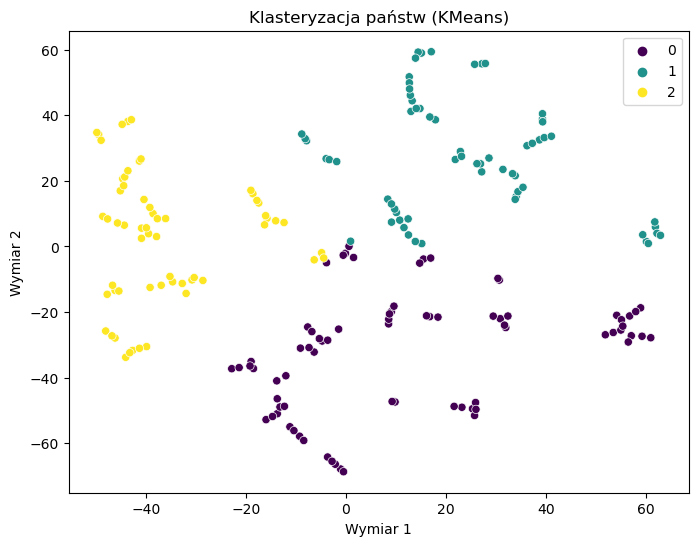

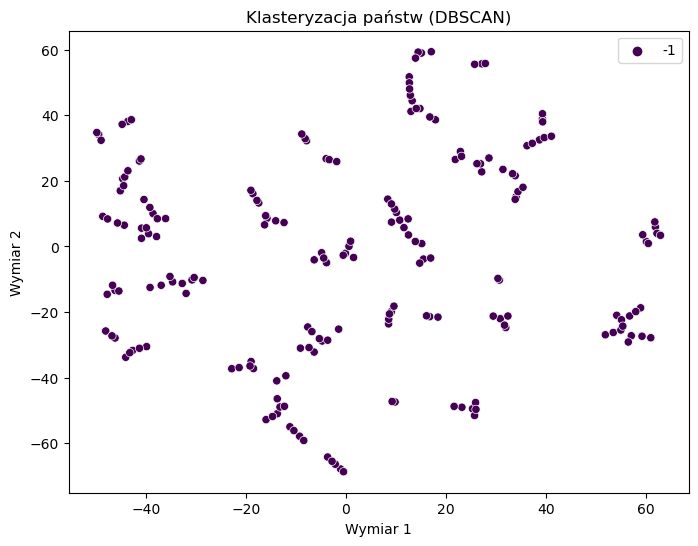

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


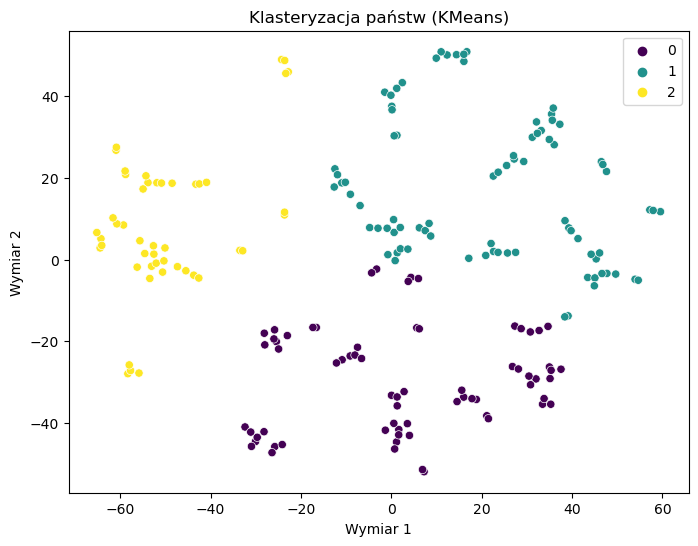

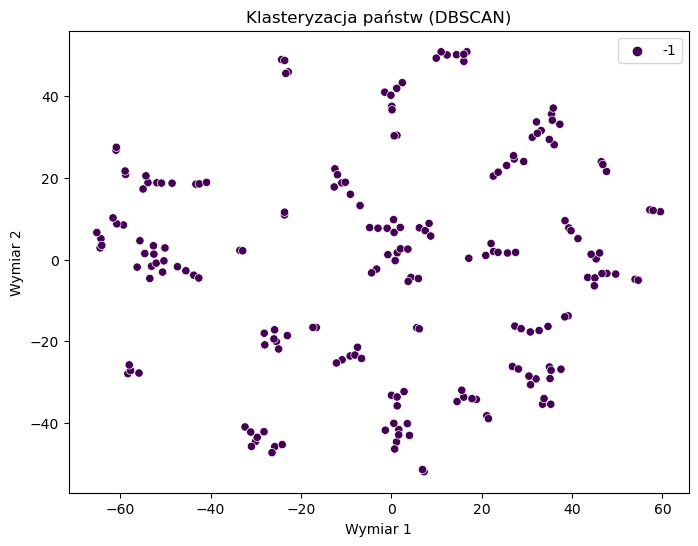

(array([0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0,
        0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2,
        2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
        1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2,
        1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0,
        2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2,
        2]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -

In [ ]:
def cluster_data_with_methods(df, n_clusters=3, eps=0.5, min_samples=5):
    data_scaled = preprocess_data(df)
    
    data_2d = reduce_dimensions(data_scaled)
    
    kmeans_clusters = cluster_data(data_2d, n_clusters)
    plot_clusters(data_2d, kmeans_clusters, method_name="KMeans")
    
    dbscan_clusters = cluster_data_dbscan(data_2d, eps, min_samples)
    plot_clusters(data_2d, dbscan_clusters, method_name="DBSCAN")
    
    return kmeans_clusters, dbscan_clusters

cluster_data_with_methods(e_dhg.drop(columns=['location_key']))
cluster_data_with_methods(e_wb.drop(columns=['location_key']))

In [ ]:
e_dhg.head(10)

,location_key,openstreetmap_id,area_sq_km,area_rural_sq_km,area_urban_sq_km,life_expectancy,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,...,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,9407.0,470.0,90751.0,2955.0,74.40500,7.7,2.7,173.809,94.6195,...,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,307763.0,83600.0,70575.0,8568.0,77.81400,16.3,6.5,69.555,44.8630,...,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,303427.0,652860.0,90751.0,2955.0,64.48600,9.2,47.9,237.554,192.5320,...,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AG,536900.0,440.0,167.0,266.0,76.88500,13.1,5.0,126.917,83.1360,...,0.780,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
4,AL,53292.0,28750.0,26686.0,1689.0,78.90000,9.0,7.8,93.315,49.4860,...,0.764,319074.0,381542.0,474360.0,366807.0,339697.0,398271.0,315510.0,190753.0,52224.0
5,AO,195267.0,1246700.0,1248198.0,1427.0,60.78200,4.5,51.6,327.044,220.2910,...,0.581,10899168.0,7881779.0,5306037.0,3699729.0,2412735.0,1464602.0,785897.0,331729.0,84592.0
6,AR,286393.0,2780400.0,2690269.0,55032.0,76.52000,5.9,8.8,147.086,79.4830,...,0.825,6718871.0,7045513.0,6430658.0,5777148.0,4507125.0,3911943.0,2914251.0,1817557.0,994030.0
7,AT,16239.0,83879.0,90751.0,2955.0,81.80000,6.6,2.9,79.032,41.7790,...,0.908,855419.0,862277.0,1134471.0,1203124.0,1209216.0,1382468.0,989286.0,779997.0,442517.0
8,AU,80500.0,7741220.0,7641564.0,36745.0,82.74878,5.6,3.1,75.835,44.6730,...,0.939,3308974.0,3130480.0,3375454.0,3718344.0,3306060.0,3107735.0,2651187.0,1846376.0,1055271.0
9,AW,1231749.0,180.0,9.0,172.0,76.15200,11.6,13.9,110.630,68.5140,...,0.735,11757.0,14010.0,14980.0,11244.0,14271.0,17205.0,13754.0,6958.0,2587.0


In [123]:
e_dhg.drop(columns=['location_key'])

,openstreetmap_id,area_sq_km,area_rural_sq_km,area_urban_sq_km,life_expectancy,diabetes_prevalence,infant_mortality_rate,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,...,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,9407.0,470.0,90751.0,2955.0,74.405,7.7,2.7,173.809,94.6195,63.9,...,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,307763.0,83600.0,70575.0,8568.0,77.814,16.3,6.5,69.555,44.8630,54.7,...,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,303427.0,652860.0,90751.0,2955.0,64.486,9.2,47.9,237.554,192.5320,211.1,...,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,536900.0,440.0,167.0,266.0,76.885,13.1,5.0,126.917,83.1360,29.9,...,0.780,14583.0,13867.0,14894.0,14094.0,13860.0,12832.0,8043.0,4101.0,1654.0
4,53292.0,28750.0,26686.0,1689.0,78.900,9.0,7.8,93.315,49.4860,68.0,...,0.764,319074.0,381542.0,474360.0,366807.0,339697.0,398271.0,315510.0,190753.0,52224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1872673.0,2840.0,2748.0,108.0,73.187,9.2,13.6,138.239,80.7350,85.0,...,0.713,51123.0,41998.0,31295.0,22012.0,19560.0,16470.0,9960.0,4580.0,1412.0
195,305092.0,527970.0,411287.0,4703.0,66.096,5.4,42.9,219.749,174.5580,194.2,...,0.452,8033408.0,6750274.0,5732746.0,4140438.0,2362804.0,1422835.0,879450.0,403471.0,100542.0
196,87565.0,1219090.0,53460.0,53460.0,63.857,12.7,28.5,376.404,248.8160,86.7,...,0.699,11585605.0,10409174.0,10141489.0,10155325.0,7043275.0,4911532.0,3164441.0,1476055.0,421794.0
197,195271.0,752610.0,90751.0,2955.0,63.510,4.5,40.4,321.143,221.5730,127.2,...,0.588,5663542.0,4550181.0,3180383.0,2185194.0,1413889.0,761259.0,403835.0,179965.0,45708.0


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


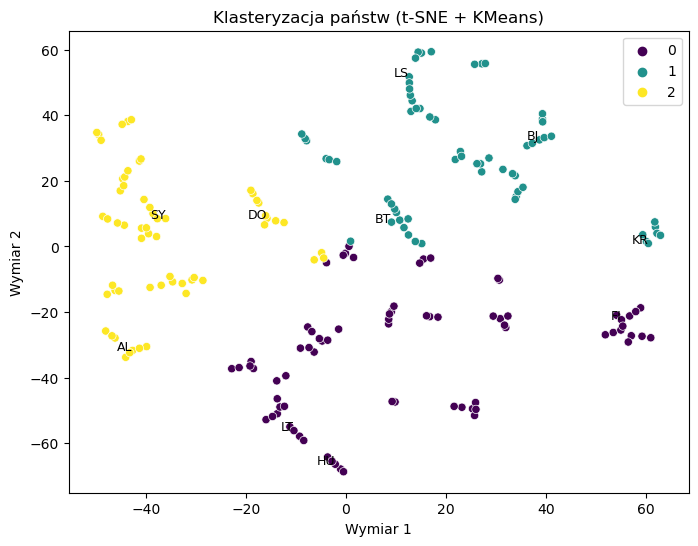

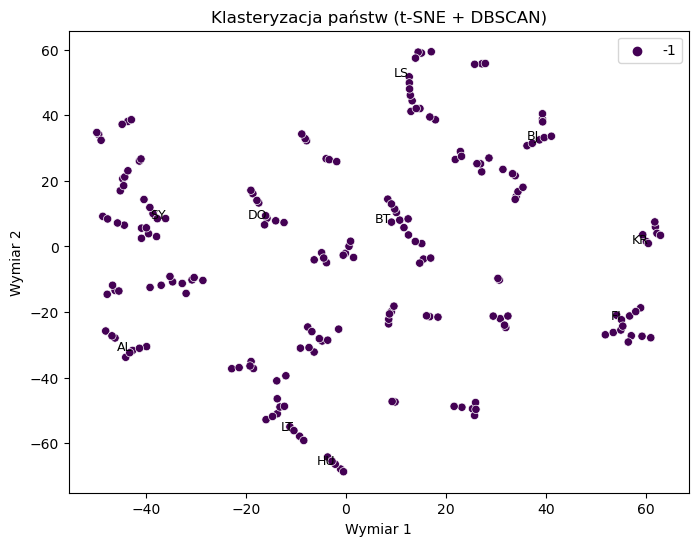

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


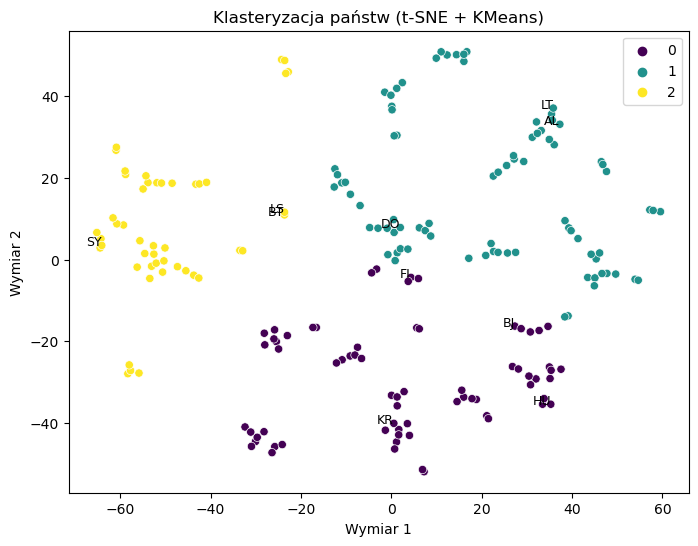

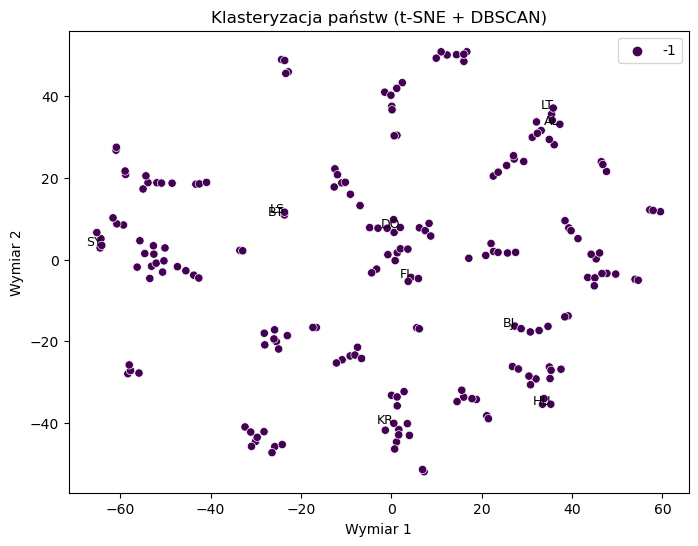

(array([0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0,
        0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2,
        2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
        1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2,
        1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0,
        2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2,
        2]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random


def plot_clusters_with_labels(data_2d, clusters, location_keys, df, method_name=""):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=clusters, palette="viridis")
    
    for loc_key in location_keys:
        idx = df[df['location_key'] == loc_key].index[0]
        plt.text(data_2d[idx, 0], data_2d[idx, 1], loc_key, fontsize=9, color='black', ha='right')
    
    plt.title(f"Klasteryzacja państw (t-SNE + {method_name})")
    plt.xlabel("Wymiar 1")
    plt.ylabel("Wymiar 2")
    plt.show()

def cluster_data_with_methods(df, n_clusters=3, eps=0.5, min_samples=5, location_keys=[]):
    df_without_location = df.drop(columns=['location_key'])
    
    data_scaled = preprocess_data(df_without_location)
    
    data_2d = reduce_dimensions(data_scaled)
    
    kmeans_clusters = cluster_data(data_2d, n_clusters)
    plot_clusters_with_labels(data_2d, kmeans_clusters, location_keys, df, method_name="KMeans")
    
    dbscan_clusters = cluster_data_dbscan(data_2d, eps, min_samples)
    plot_clusters_with_labels(data_2d, dbscan_clusters, location_keys, df, method_name="DBSCAN")
    
    return kmeans_clusters, dbscan_clusters

location_keys = random.sample(list(e_wb['location_key'].unique()), 10)

cluster_data_with_methods(e_dhg, n_clusters=3, eps=0.5, min_samples=5, location_keys=location_keys)
cluster_data_with_methods(e_wb, n_clusters=3, eps=0.5, min_samples=5, location_keys=location_keys)


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


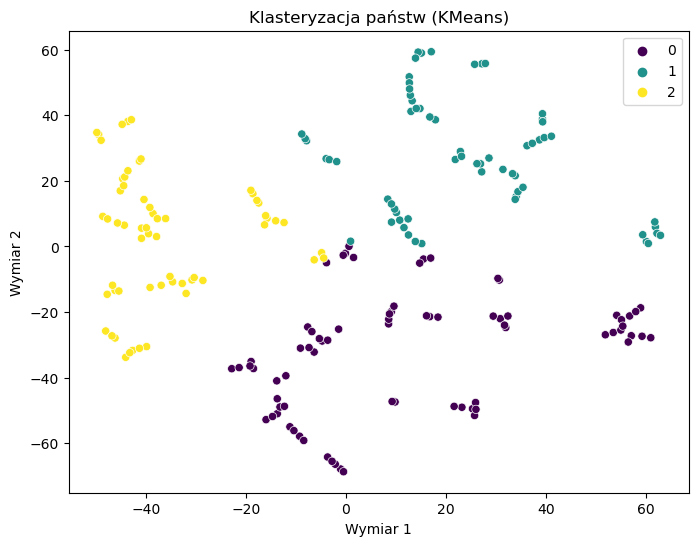

Najlepsze eps: None
Najlepsze min_samples: None
Najlepszy współczynnik silhouette: -1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28980\3532332896.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=clusters, palette="viridis")


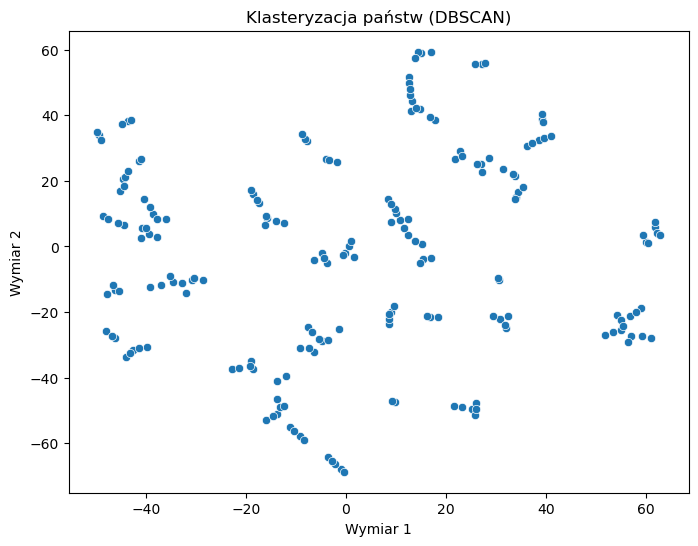

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


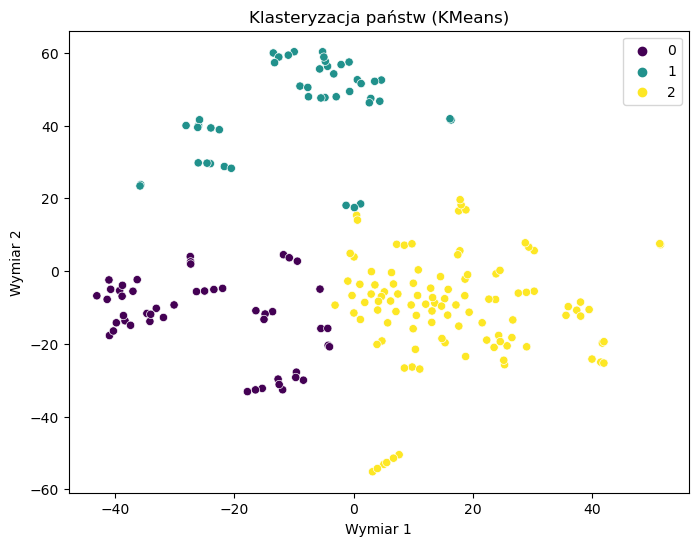

Najlepsze eps: 3.9684210526315793
Najlepsze min_samples: 3
Najlepszy współczynnik silhouette: 0.37057632207870483


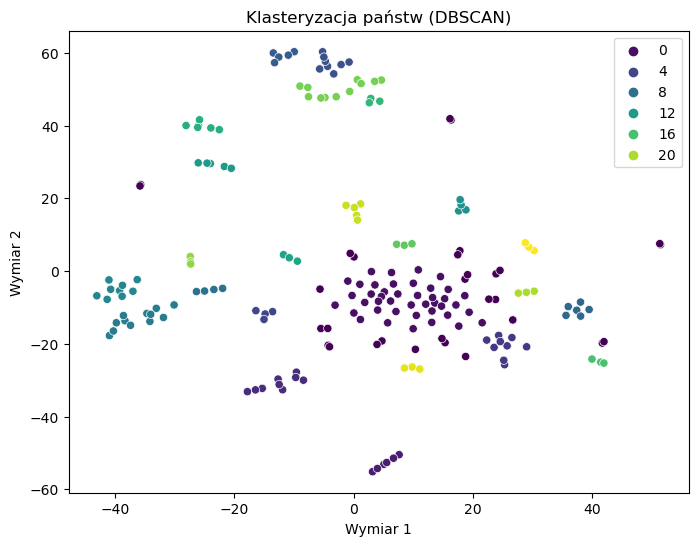

(array([2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1,
        2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 0,
        0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2,
        2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1,
        1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0,
        0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1,
        0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0,
        2]),
 array([ 0,  1,  2, -1,  3,  4, -1,  5,  6,  7, -1, -1,  7,  8,  5,  9, -1,
         1, 10,  9, -1,  3,  0,  0,  7,  0, 11, 12,  0,  6,  4,  5,  9,  0,
        10, 13,  0,  0,  7,  0,  7, -1, 14, 15,  0,  5, 16,  0, -1,  0, 12,
        17,  2, 18, 19,  5, -1,  0, 18,  0,  4, 18, 16,  8,  0,  9, 10,  4,
        18,  0, 2

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def grid_search_dbscan(data_2d, eps_range, min_samples_range):
    best_score = -1
    best_eps = None
    best_min_samples = None
    best_clusters = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data_2d)
            
            if len(set(clusters)) > 1:
                score = silhouette_score(data_2d, clusters)
                
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = clusters

    return best_eps, best_min_samples, best_score, best_clusters

def cluster_data_with_methods(df, n_clusters=3, eps_range=None, min_samples_range=None):
    data_scaled = preprocess_data(df)
    
    data_2d = reduce_dimensions(data_scaled)

    kmeans_clusters = cluster_data(data_2d, n_clusters)
    plot_clusters(data_2d, kmeans_clusters, method_name="KMeans")
    
    if eps_range is None:
        eps_range = np.linspace(0.1, 5.0, 50)
    if min_samples_range is None:
        min_samples_range = [3, 5, 10, 15]
    
    best_eps, best_min_samples, best_score, best_clusters = grid_search_dbscan(data_2d, eps_range, min_samples_range)
    print(f"Najlepsze eps: {best_eps}")
    print(f"Najlepsze min_samples: {best_min_samples}")
    print(f"Najlepszy współczynnik silhouette: {best_score}")
    
    plot_clusters(data_2d, best_clusters, method_name="DBSCAN")
    
    return kmeans_clusters, best_clusters


cluster_data_with_methods(e_dhg.drop(columns=['location_key']), eps_range=np.linspace(0.1, 1.0, 10), min_samples_range=[3, 5, 10])
cluster_data_with_methods(e_wb.drop(columns=['location_key']), eps_range=np.linspace(0.1, 5.0, 20), min_samples_range=[3, 5, 10, 15])
